In [149]:
import re
import numpy as np    
import pandas as pd
import datetime as dt  
import pandas_datareader.data as web             

import matplotlib as mpl                         
import matplotlib.pyplot as plt

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels import regression
import statsmodels.api as sm
import math
import scipy.optimize as sco
from scipy import optimize

import os

In [150]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.cluster import KMeans

In [151]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [152]:
os.chdir('/Users/elifriedmann/Downloads')

In [153]:
path=os.getcwd()

In [154]:
overscore=pd.read_excel('Peer View Table for JPM-13.xlsx')
overscore

,Rank,Company Name,HQ,Industry Group,Mkt. Cap (M),ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score
0,1,JPMorgan Chase & Co,US,Banking Services,"$416,514",84.66,82,86,84,23,98,72,80,83,96,91,74,99,45,71
1,2,Bank of America Corp,US,Banking Services,"$230,069",81.28,84,92,66,12,96,85,80,98,87,98,74,56,78,97
2,3,Huntington Bancshares Inc,US,Banking Services,"$15,476",78.87,71,78,83,100,75,72,70,86,40,99,74,84,79,86
3,4,Fifth Third Bancorp,US,Banking Services,"$18,168",78.78,90,80,72,92,95,84,91,84,60,95,74,72,63,86
4,5,Capital One Financial Corp,US,Banking Services,"$41,663",75.77,62,79,77,92,92,78,51,80,57,98,74,92,62,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,327,Kearny Financial Corp,US,Banking Services,$488,12.18,0,10,20,100,0,0,0,6,0,10,30,15,48,0
327,328,Home Bancorp Inc,US,Banking Services,$278,10.41,0,12,12,100,0,0,0,1,0,28,30,11,23,0
328,329,National Bankshares Inc,US,Banking Services,$185,8.68,0,11,9,100,0,0,0,4,0,19,30,6,24,0
329,330,Hingham Institution For Savings,US,Banking Services,$450,8.39,0,9,11,100,0,0,0,7,0,4,30,11,19,0


In [155]:
socialscore=pd.read_excel('Peer View Table for JPM-11.xlsx')
socialscore

,Rank,Company Name,HQ,Industry Group,Mkt. Cap (M),Social Pillar Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Gender Pay Gap Percentage,Women Employees,Women Managers,Turnover of Employees,Injuries To Million Hours,Average Training Hours,Training Costs Per Employee,Policy Fair Competition,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy
0,1,Bank of America Corp,US,Banking Services,"$230,069",91.64,True,True,99.00%,50.00%,46.00%,7.00%,NaN,42.0,"$1,596",True,True,True,True,True
1,2,JPMorgan Chase & Co,US,Banking Services,"$416,514",85.64,True,False,99.00%,49.00%,NaN,NaN,NaN,27.0,$783,True,True,True,True,True
2,3,Wells Fargo & Co,US,Banking Services,"$157,181",81.86,True,False,99.00%,54.10%,52.58%,14.10%,NaN,51.0,"$1,058",False,True,True,True,True
3,4,Fifth Third Bancorp,US,Banking Services,"$18,168",80.28,True,True,99.00%,59.20%,52.00%,13.90%,NaN,37.0,NaN,True,True,True,True,True
4,5,Capital One Financial Corp,US,Banking Services,"$41,663",78.80,True,False,100.00%,51.90%,31.60%,NaN,NaN,NaN,NaN,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,327,Hingham Institution For Savings,US,Banking Services,$450,8.95,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True
327,328,Medallion Financial Corp,US,Banking Services,$181,8.71,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,False,False
328,329,ESSA Bancorp Inc,US,Banking Services,$166,8.46,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True
329,330,Heritage Commerce Corp,US,Banking Services,$512,6.73,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False


In [156]:
governscore=pd.read_excel('Peer View Table for JPM-12.xlsx')
governscore

,Rank,Company Name,HQ,Industry Group,Mkt. Cap (M),Governance Pillar Score,Independent Board Members,Audit Committee Independence,Compensation Committee Independence,Nomination Committee Independence,"Board Gender Diversity, Percent","Executive Members Gender Diversity, Percent",Average Board Tenure,CEO Chairman Duality,Executive Compensation LT Objectives,Sustainability Compensation Incentives,Shareholders Approval Stock Compensation Plan,Shareholders Vote on Executive Pay,State Owned Enterprise SOE,Anti Takeover Devices Above Two
0,1,Comerica Inc,US,Banking Services,"$5,571",90.64,90.91%,100.00%,100.00%,100.00%,27.27%,38.46%,10.52 Yrs,True,True,True,True,True,False,4
1,2,Bread Financial Holdings Inc,US,Banking Services,"$1,514",90.24,90.00%,100.00%,100.00%,100.00%,28.57%,37.50%,11.36 Yrs,False,False,True,True,True,False,5
2,3,Triumph Financial Inc,US,Banking Services,"$1,412",89.20,92.31%,100.00%,100.00%,100.00%,30.00%,16.67%,8.02 Yrs,False,False,True,True,True,False,7
3,4,American Express Co,US,Banking Services,"$125,912",89.09,92.86%,100.00%,100.00%,100.00%,28.57%,46.15%,7.18 Yrs,True,False,True,True,True,False,5
4,5,Citizens Financial Group Inc,US,Banking Services,"$13,164",85.63,92.31%,100.00%,100.00%,100.00%,25.00%,27.27%,8.31 Yrs,True,False,True,True,True,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,327,Home Bancorp Inc,US,Banking Services,$278,11.89,87.50%,100.00%,100.00%,80.00%,14.29%,0.00%,12.00 Yrs,True,False,False,True,False,False,8
327,328,Hingham Institution For Savings,US,Banking Services,$450,10.96,60.00%,100.00%,NaN,100.00%,20.00%,20.00%,18.42 Yrs,True,False,False,True,True,False,2
328,329,National Bankshares Inc,US,Banking Services,$185,8.57,83.33%,85.71%,88.89%,100.00%,16.67%,33.33%,8.56 Yrs,True,False,False,True,True,False,7
329,330,First Mid Bancshares Inc,US,Banking Services,$518,8.45,88.89%,87.50%,87.50%,NaN,25.00%,25.00%,13.67 Yrs,True,False,False,True,True,False,9


In [157]:
envscore=pd.read_excel('Peer View Table for JPM-10.xlsx')
envscore

,Rank,Company Name,HQ,Industry Group,Mkt. Cap (M),Environmental Pillar Score,Policy Energy Efficiency,Targets Energy Efficiency,Total Energy Use To Revenues USD in million,Renewable Energy Use Ratio,Policy Emissions,Targets Emissions,Total CO2 Equivalent Emissions To Revenues USD in million,"CO2 Equivalent Emissions Indirect, Scope 3 To Revenues USD in million",Policy Water Efficiency,Targets Water Efficiency,Water Use To Revenues USD in million,Water Pollutant Emissions To Revenues USD in million,Total Waste To Revenues USD in million,Policy Environmental Supply Chain
0,1,Fifth Third Bancorp,US,Banking Services,"$18,168",90.06,True,True,102.0,70.80%,True,True,11.0,1.0,True,True,68.0,NaN,1.0,True
1,2,Bank of America Corp,US,Banking Services,"$230,069",83.58,True,False,89.0,94.52%,True,True,8.0,39.0,True,False,78.0,NaN,1.0,True
2,3,JPMorgan Chase & Co,US,Banking Services,"$416,514",81.80,True,False,59.0,86.65%,True,True,6.0,0.0,False,True,42.0,NaN,NaN,True
3,4,Wells Fargo & Co,US,Banking Services,"$157,181",81.03,True,False,99.0,81.80%,True,True,10.0,33.0,True,False,90.0,NaN,1.0,True
4,5,Regions Financial Corp,US,Banking Services,"$16,768",76.57,True,True,109.0,NaN,True,True,13.0,0.0,True,False,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,156,Bogota Financial Corp,US,Banking Services,$112,0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,NaN,False
327,156,Provident Bancorp Inc (Maryland),US,Banking Services,$142,0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,NaN,False
328,156,Rocket Companies Inc,US,Banking Services,"$17,743",0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,NaN,False
329,156,Firstcash Holdings Inc,US,Banking Services,"$4,292",0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,NaN,False


In [158]:
for just in [envscore, overscore, socialscore, governscore]:
    for x in just.index:
        if just['HQ'][x]!='US':
            just.drop(x, axis=0, inplace=True)
            ++x
    print(just['HQ'].value_counts())

HQ
US    331
Name: count, dtype: int64
HQ
US    331
Name: count, dtype: int64
HQ
US    331
Name: count, dtype: int64
HQ
US    331
Name: count, dtype: int64


In [159]:
for col in envscore:
    print(envscore[col].value_counts())

Rank
156    176
106     42
99       5
150      5
78       3
      ... 
31       1
30       1
29       1
28       1
50       1
Name: count, Length: 94, dtype: int64
Company Name
Fifth Third Bancorp                   1
Dime Community Bancshares Inc         1
Auburn National Bancorporation Inc    1
American National Bankshares Inc      1
ACNB Corp                             1
                                     ..
Community Trust Bancorp Inc           1
Mid Penn Bancorp Inc                  1
SouthState Corp                       1
CVB Financial Corp                    1
Princeton Bancorp Inc                 1
Name: count, Length: 331, dtype: int64
HQ
US    331
Name: count, dtype: int64
Industry Group
Banking Services    331
Name: count, dtype: int64
Mkt. Cap (M)
$252      4
$291      3
$166      3
$120      3
$224      3
         ..
$5,252    1
$427      1
$673      1
$2,087    1
$4,292    1
Name: count, Length: 293, dtype: int64
Environmental Pillar Score
0.00     176
1.80      42
2.8

In [160]:
envscore.drop('Water Pollutant Emissions To Revenues USD in million', axis=1, inplace=True)
envscore

,Rank,Company Name,HQ,Industry Group,Mkt. Cap (M),Environmental Pillar Score,Policy Energy Efficiency,Targets Energy Efficiency,Total Energy Use To Revenues USD in million,Renewable Energy Use Ratio,Policy Emissions,Targets Emissions,Total CO2 Equivalent Emissions To Revenues USD in million,"CO2 Equivalent Emissions Indirect, Scope 3 To Revenues USD in million",Policy Water Efficiency,Targets Water Efficiency,Water Use To Revenues USD in million,Total Waste To Revenues USD in million,Policy Environmental Supply Chain
0,1,Fifth Third Bancorp,US,Banking Services,"$18,168",90.06,True,True,102.0,70.80%,True,True,11.0,1.0,True,True,68.0,1.0,True
1,2,Bank of America Corp,US,Banking Services,"$230,069",83.58,True,False,89.0,94.52%,True,True,8.0,39.0,True,False,78.0,1.0,True
2,3,JPMorgan Chase & Co,US,Banking Services,"$416,514",81.80,True,False,59.0,86.65%,True,True,6.0,0.0,False,True,42.0,NaN,True
3,4,Wells Fargo & Co,US,Banking Services,"$157,181",81.03,True,False,99.0,81.80%,True,True,10.0,33.0,True,False,90.0,1.0,True
4,5,Regions Financial Corp,US,Banking Services,"$16,768",76.57,True,True,109.0,NaN,True,True,13.0,0.0,True,False,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,156,Bogota Financial Corp,US,Banking Services,$112,0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False
327,156,Provident Bancorp Inc (Maryland),US,Banking Services,$142,0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False
328,156,Rocket Companies Inc,US,Banking Services,"$17,743",0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False
329,156,Firstcash Holdings Inc,US,Banking Services,"$4,292",0.00,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False


In [161]:
for col in ['Rank', 'Industry Group']:
    socialscore=socialscore.drop(col, axis=1)
    envscore=envscore.drop(col, axis=1)
    overscore=overscore.drop(col, axis=1)
    governscore=governscore.drop(col, axis=1)
overscore.drop(['Social Pillar Score','Governance Pillar Score','Environmental Pillar Score'], axis=1,inplace=True)

In [162]:
mergecols=['Company Name','Mkt. Cap (M)','HQ']
df1=pd.merge(overscore, governscore, on=mergecols, how='outer')
df2=pd.merge(envscore, socialscore, on=mergecols, how='outer')
df = pd.merge(df1,df2, on=mergecols, how='outer')
df

,Company Name,HQ,Mkt. Cap (M),ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,...,Women Managers,Turnover of Employees,Injuries To Million Hours,Average Training Hours,Training Costs Per Employee,Policy Fair Competition,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy
0,JPMorgan Chase & Co,US,"$416,514",84.66,23,98,72,80,83,96,...,NaN,NaN,NaN,27.0,$783,True,True,True,True,True
1,Bank of America Corp,US,"$230,069",81.28,12,96,85,80,98,87,...,46.00%,7.00%,NaN,42.0,"$1,596",True,True,True,True,True
2,Huntington Bancshares Inc,US,"$15,476",78.87,100,75,72,70,86,40,...,NaN,NaN,NaN,28.0,NaN,True,True,True,True,True
3,Fifth Third Bancorp,US,"$18,168",78.78,92,95,84,91,84,60,...,52.00%,13.90%,NaN,37.0,NaN,True,True,True,True,True
4,Capital One Financial Corp,US,"$41,663",75.77,92,92,78,51,80,57,...,31.60%,NaN,NaN,NaN,NaN,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Kearny Financial Corp,US,$488,12.18,100,0,0,0,6,0,...,NaN,NaN,NaN,NaN,NaN,False,True,True,False,True
327,Home Bancorp Inc,US,$278,10.41,100,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,False,True,True,False,True
328,National Bankshares Inc,US,$185,8.68,100,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,False,True,True,False,True
329,Hingham Institution For Savings,US,$450,8.39,100,0,0,0,7,0,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True


In [163]:
df['Total Waste To Revenues USD in million'].value_counts()

Total Waste To Revenues USD in million
1.0    5
0.0    3
Name: count, dtype: int64

In [164]:
df['Women Employees'].value_counts()

Women Employees
70.00%    9
58.00%    8
68.00%    5
59.00%    5
64.00%    4
67.00%    4
75.00%    4
69.00%    3
72.00%    3
52.00%    3
66.00%    3
50.00%    3
74.00%    2
65.00%    2
54.00%    2
60.00%    2
47.00%    1
68.74%    1
54.50%    1
66.80%    1
31.00%    1
44.00%    1
67.16%    1
72.30%    1
42.00%    1
71.00%    1
56.60%    1
76.00%    1
55.00%    1
74.50%    1
45.00%    1
49.00%    1
75.20%    1
57.00%    1
59.18%    1
59.20%    1
51.90%    1
58.90%    1
54.10%    1
62.00%    1
57.80%    1
53.00%    1
68.53%    1
77.00%    1
64.30%    1
57.30%    1
65.20%    1
65.60%    1
34.00%    1
Name: count, dtype: int64

In [165]:
df.drop('HQ', axis=1, inplace=True)

In [166]:
for r in df.index:
    if df['Company Name'][r]=='Peoples Bancorp Inc':
        print(df['Company Name'][r])

Peoples Bancorp Inc


In [167]:
ptob=pd.read_excel('GridExport_June_21_2023_16_6_33.xlsx')
ptob

,Identifier (RIC),Company Name,Price / Book Value Per Share (SmartEstimate ®)\n(NTM),Beta,Market Cap,ESG Controversies Score\n(FY0),"Earnings Per Share - Mean\n(FY1, usd)","Return on Average Common Equity - %, TTM\n(FI0)","Return on Average Total Assets - %, TTM\n(FI0)"
0,JPM,JPMorgan Chase & Co,1.351905,1.083576,4.165138e+11,1.712329,14.571350,0.152211,0.010915
1,DBKGn.DE,Deutsche Bank AG,0.288659,1.227375,2.078170e+10,21.634615,2.093241,0.084531,0.004342
2,BNPP.PA,BNP Paribas SA,0.583370,1.741839,7.648008e+10,7.534247,8.939382,0.074731,0.003741
3,TRBK.PK,Traditions Bancorp Inc,NaN,NaN,4.928240e+07,NaN,NaN,NaN,NaN
4,HVBC.OQ^F23,HV Bancorp Inc,NaN,NaN,7.740757e+07,NaN,NaN,0.052765,0.003785
...,...,...,...,...,...,...,...,...,...
1596,CPPTL.PK,Copper Property CTL Pass Through Trust,NaN,1.046795,8.250000e+08,NaN,NaN,0.070056,0.061844
1597,OSOL.PK,Osprey Solana Trust,NaN,NaN,1.897395e+06,NaN,NaN,NaN,NaN
1598,DEFG.PK,Grayscale Decentralized Finance (DeFi) Fund LLC,NaN,NaN,3.509400e+06,NaN,NaN,NaN,NaN
1599,CCFLU.PK,CCF Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
market='Mkt. Cap (M)'
for i in df.index:
    if str(df.loc[i,market]).__contains__(','):
        df.loc[i,market]=str(df.loc[i,market]).replace(',','')
c='Average Board Tenure'
for i in df.index:
    if str(df.loc[i,c]).__contains__(' Yrs'):
        df.loc[i,c]=str(df.loc[i,c]).replace(' Yrs','')
        df.loc[i,c]=float(df.loc[i,c])
    else:
        df.loc[i,c]=float(df.loc[i,c])
df[c] = df[c].astype(str).str.extract(r'(\d+\.\d+|\d+)')
df[c] = pd.to_numeric(df[c], downcast='float')   
df.rename({c:c+' (Years)'}, axis=1, inplace=True)
for col in df:
    for i in df.index:
        if str(df.loc[i,col]).__contains__('$'):
            df[col] = df[col].astype(str).str.extract(r'(\d+\.\d+|\d+)')
            df[col] = pd.to_numeric(df[col], downcast='float')
            df.rename({col: col+' ($)'}, axis=1, inplace=True)
            print(col)
            break
        i=i+1
for col in df:
    for i in df.index:
        if str(df.loc[i,col]).__contains__('%'):
            df[col] = df[col].astype(str).str.extract(r'(\d+\.\d+|\d+)')
            df[col] = pd.to_numeric(df[col], downcast='float')
            df.rename({col: col+' (%)'}, axis=1, inplace=True)
            print(col)
            break
        i=i+1


Mkt. Cap (M)
Training Costs Per Employee
Independent Board Members
Audit Committee Independence
Compensation Committee Independence
Nomination Committee Independence
Board Gender Diversity, Percent
Executive Members Gender Diversity, Percent
Renewable Energy Use Ratio
Gender Pay Gap Percentage
Women Employees
Women Managers
Turnover of Employees


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Company Name                                                           331 non-null    object 
 1   Mkt. Cap (M) ($)                                                       331 non-null    float32
 2   ESG Score                                                              331 non-null    float64
 3   ESG Controversies Score                                                331 non-null    int64  
 4   Resource Use Score                                                     331 non-null    int64  
 5   Emissions Score                                                        331 non-null    int64  
 6   Environmental Innovation Score                                         331 non-null    int

In [170]:
n=[]
for col in df:
    if df[col].dtype==object:
        n.append(col)
        print(df[col].value_counts())
n

Company Name
JPMorgan Chase & Co            1
National Bank Holdings Corp    1
Citizens Holding Co            1
FB Financial Corp              1
Sterling Bancorp Inc           1
                              ..
Lakeland Bancorp Inc           1
Waterstone Financial Inc       1
Flushing Financial Corp        1
First Western Financial Inc    1
Exchange Bank                  1
Name: count, Length: 331, dtype: int64
State Owned Enterprise SOE
False    328
True       2
Name: count, dtype: int64


['Company Name', 'State Owned Enterprise SOE']

In [171]:
n=['Total Energy Use To Revenues USD in million',
 'Total CO2 Equivalent Emissions To Revenues USD in million',
 'CO2 Equivalent Emissions Indirect, Scope 3 To Revenues USD in million',
 'Water Use To Revenues USD in million']

In [172]:
for h in n:
    df[h] = df[h].astype(str).str.extract(r'(\d+\.\d+|\d+)')
    df[h] = pd.to_numeric(df[h], downcast='float') 
df['State Owned Enterprise SOE']=df['State Owned Enterprise SOE'].astype(bool)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Company Name                                                           331 non-null    object 
 1   Mkt. Cap (M) ($)                                                       331 non-null    float32
 2   ESG Score                                                              331 non-null    float64
 3   ESG Controversies Score                                                331 non-null    int64  
 4   Resource Use Score                                                     331 non-null    int64  
 5   Emissions Score                                                        331 non-null    int64  
 6   Environmental Innovation Score                                         331 non-null    int

In [174]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,Mkt. Cap (M) ($),ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Women Managers (%),Turnover of Employees (%),Injuries To Million Hours,Average Training Hours,Training Costs Per Employee ($),Policy Fair Competition,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy
Mkt. Cap (M) ($),1.000000,0.406374,-0.507279,0.525908,0.440899,0.448295,0.342548,0.539981,0.216109,0.252784,...,0.032415,-0.258675,-0.288678,0.279533,0.018153,0.064229,0.059589,0.038941,0.078099,0.015891
ESG Score,0.406374,1.000000,-0.138295,0.733202,0.706403,0.605188,0.733077,0.571042,0.705082,0.572673,...,-0.034723,-0.264424,-0.315124,0.325677,-0.050753,0.366529,0.261290,0.192922,0.343618,0.088384
ESG Controversies Score,-0.507279,-0.138295,1.000000,-0.251399,-0.222611,-0.278297,-0.080660,-0.267169,-0.104113,-0.087148,...,-0.030884,0.214220,NaN,-0.379736,0.288527,-0.089252,-0.073189,-0.047057,0.041838,-0.018767
Resource Use Score,0.525908,0.733202,-0.251399,1.000000,0.848077,0.633638,0.623713,0.724125,0.504348,0.510634,...,-0.086938,-0.373871,0.331560,0.312457,-0.089365,0.196734,0.159665,0.090972,0.202367,0.044250
Emissions Score,0.440899,0.706403,-0.222611,0.848077,1.000000,0.604518,0.630400,0.626413,0.515603,0.513366,...,-0.038732,-0.368832,0.180494,0.197208,-0.204054,0.176779,0.166552,0.084199,0.228299,0.054369
Environmental Innovation Score,0.448295,0.605188,-0.278297,0.633638,0.604518,1.000000,0.502329,0.465478,0.391532,0.410896,...,-0.055484,-0.299672,0.293026,0.392745,0.228631,0.165676,0.102702,0.084860,0.164492,0.033843
Workforce Score,0.342548,0.733077,-0.080660,0.623713,0.630400,0.502329,1.000000,0.434803,0.498315,0.396237,...,0.253412,-0.529097,-0.633821,0.398380,-0.283594,0.189081,0.159379,0.108784,0.356225,0.084009
Human Rights Score,0.539981,0.571042,-0.267169,0.724125,0.626413,0.465478,0.434803,1.000000,0.317443,0.298919,...,-0.324213,-0.136000,0.176068,0.293605,-0.022001,0.114244,0.087757,0.034967,0.114724,0.028342
Community Score,0.216109,0.705082,-0.104113,0.504348,0.515603,0.391532,0.498315,0.317443,1.000000,0.453844,...,-0.001015,-0.334042,-0.738154,0.000085,0.180870,0.635837,0.544898,0.434936,0.388622,0.129794
Product Responsibility Score,0.252784,0.572673,-0.087148,0.510634,0.513366,0.410896,0.396237,0.298919,0.453844,1.000000,...,0.115590,-0.361734,-0.598427,0.227244,0.430871,0.212122,0.131506,0.146787,0.268771,0.198033


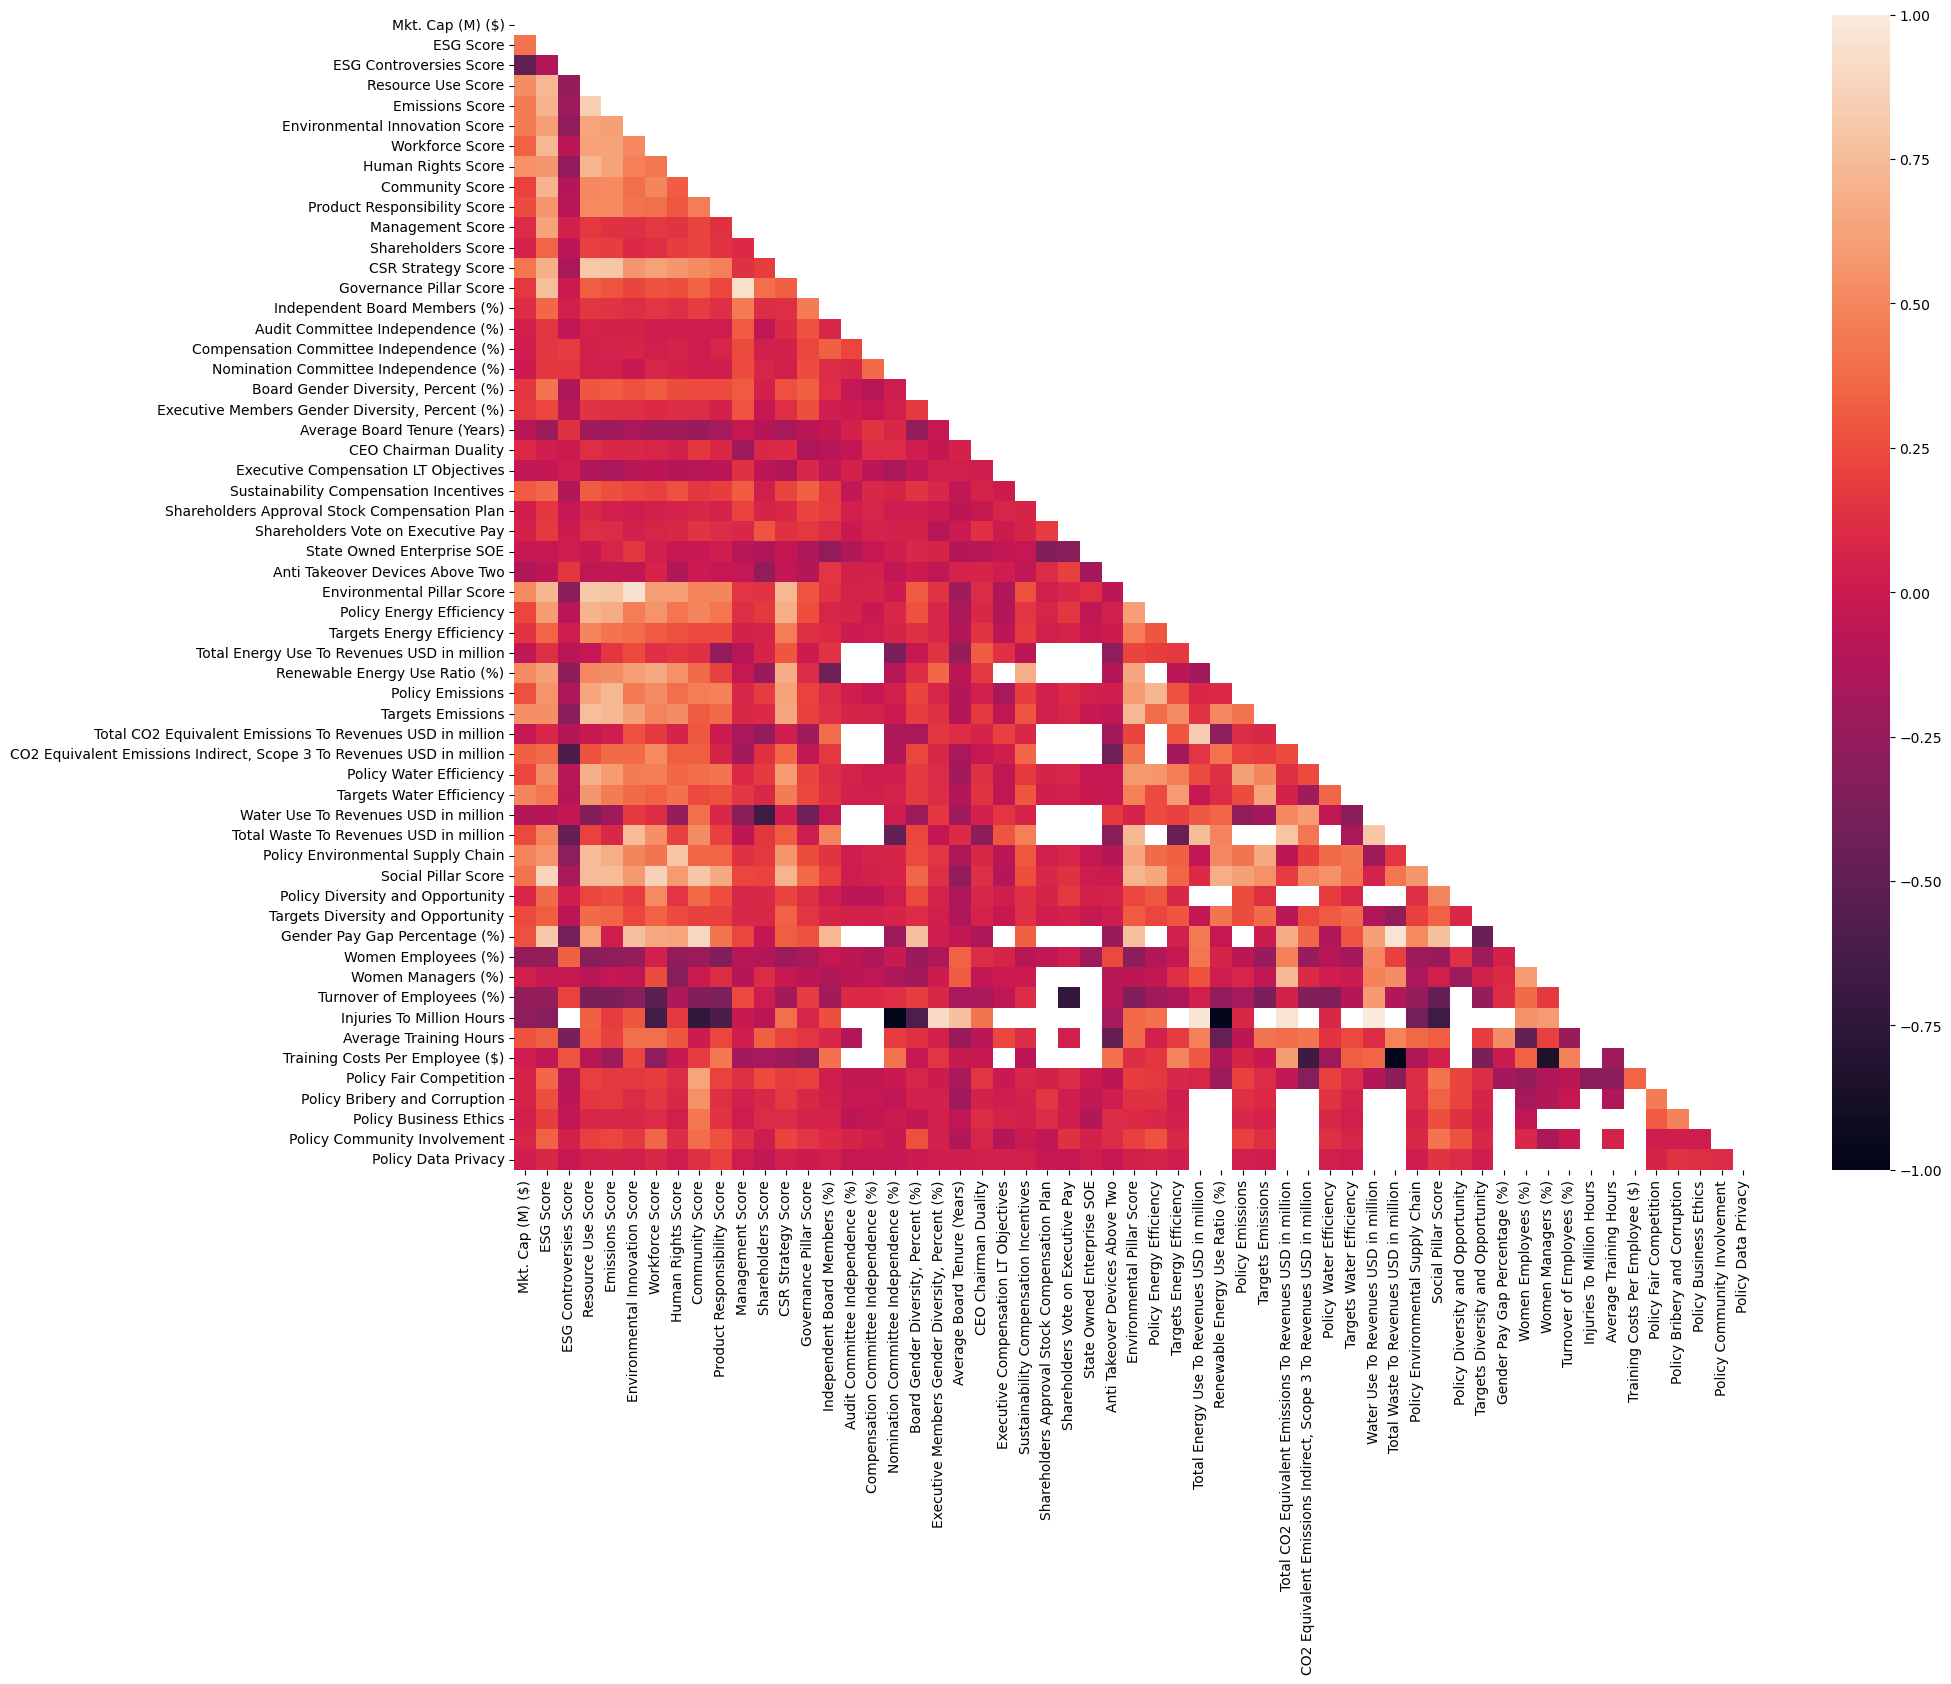

In [175]:
plt.subplots(figsize=(20,15))
mask=np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, mask=mask);

In [176]:
row_threshold = len(df.columns) * 0.3

df = df.dropna(thresh=row_threshold)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Company Name                                                           331 non-null    object 
 1   Mkt. Cap (M) ($)                                                       331 non-null    float32
 2   ESG Score                                                              331 non-null    float64
 3   ESG Controversies Score                                                331 non-null    int64  
 4   Resource Use Score                                                     331 non-null    int64  
 5   Emissions Score                                                        331 non-null    int64  
 6   Environmental Innovation Score                                         331 non-null    int

In [177]:
col_threshold = len(df) * 0.7

df = df.dropna(axis=1, thresh=col_threshold)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Company Name                                     331 non-null    object 
 1   Mkt. Cap (M) ($)                                 331 non-null    float32
 2   ESG Score                                        331 non-null    float64
 3   ESG Controversies Score                          331 non-null    int64  
 4   Resource Use Score                               331 non-null    int64  
 5   Emissions Score                                  331 non-null    int64  
 6   Environmental Innovation Score                   331 non-null    int64  
 7   Workforce Score                                  331 non-null    int64  
 8   Human Rights Score                               331 non-null    int64  
 9   Community Score                 

In [179]:
df['Size']=''
mkt='Mkt. Cap (M) ($)'
M=1000000
for i in df[mkt].index:
    if df.loc[i, mkt] > 10000*M:
        df.loc[i,'Size']='Large'
    elif df.loc[i, mkt] < 2000*M:
        df.loc[i,'Size']='Small'
    else:
        df.loc[i, mkt]='Medium'

In [180]:
x,y,z=[],[],[]
for d in df.index:
    if df.loc[i, 'Size']!='Small':
        x.append(d)
    if df.loc[i, 'Size'] !='Medium':
        y.append(d)
    if df.loc[i, 'Size'] != 'Large':
        z.append(d)
df_1=df.drop(x,axis=0)
df_2=df.drop(y,axis=0)
df_3=df.drop(z,axis=0)

In [181]:
c=[df_1, df_2, df_3]
for x in c:
    for col in x:
        if x[col].dtype==bool or x[col].dtype==object:
            x[col].fillna(x[col].mode())
        else:
            x[col].fillna(x[col].mean())
print('done')
            

done


In [182]:
combined_df = pd.concat([df_1, df_2, df_3])
combined_df = combined_df.reset_index(drop=True)

In [183]:
cormatrix=combined_df.corr(numeric_only=True)
cormatrix

,Mkt. Cap (M) ($),ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Targets Water Efficiency,Policy Environmental Supply Chain,Social Pillar Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Policy Fair Competition,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy
Mkt. Cap (M) ($),1.000000,0.406374,-0.507279,0.525908,0.440899,0.448295,0.342548,0.539981,0.216109,0.252784,...,0.494451,0.477504,0.411562,0.081700,0.249935,0.064229,0.059589,0.038941,0.078099,0.015891
ESG Score,0.406374,1.000000,-0.138295,0.733202,0.706403,0.605188,0.733077,0.571042,0.705082,0.572673,...,0.424969,0.560213,0.875364,0.378979,0.322005,0.366529,0.261290,0.192922,0.343618,0.088384
ESG Controversies Score,-0.507279,-0.138295,1.000000,-0.251399,-0.222611,-0.278297,-0.080660,-0.267169,-0.104113,-0.087148,...,-0.116157,-0.283689,-0.149746,0.021751,-0.089118,-0.089252,-0.073189,-0.047057,0.041838,-0.018767
Resource Use Score,0.525908,0.733202,-0.251399,1.000000,0.848077,0.633638,0.623713,0.724125,0.504348,0.510634,...,0.569280,0.754723,0.756967,0.232953,0.381471,0.196734,0.159665,0.090972,0.202367,0.044250
Emissions Score,0.440899,0.706403,-0.222611,0.848077,1.000000,0.604518,0.630400,0.626413,0.515603,0.513366,...,0.452609,0.683277,0.747434,0.257938,0.347597,0.176779,0.166552,0.084199,0.228299,0.054369
Environmental Innovation Score,0.448295,0.605188,-0.278297,0.633638,0.604518,1.000000,0.502329,0.465478,0.391532,0.410896,...,0.377935,0.495137,0.582448,0.184920,0.230216,0.165676,0.102702,0.084860,0.164492,0.033843
Workforce Score,0.342548,0.733077,-0.080660,0.623713,0.630400,0.502329,1.000000,0.434803,0.498315,0.396237,...,0.338910,0.415438,0.863554,0.512735,0.338664,0.189081,0.159379,0.108784,0.356225,0.084009
Human Rights Score,0.539981,0.571042,-0.267169,0.724125,0.626413,0.465478,0.434803,1.000000,0.317443,0.298919,...,0.404523,0.797053,0.592590,0.154865,0.249955,0.114244,0.087757,0.034967,0.114724,0.028342
Community Score,0.216109,0.705082,-0.104113,0.504348,0.515603,0.391532,0.498315,0.317443,1.000000,0.453844,...,0.246410,0.352264,0.799495,0.370787,0.205110,0.635837,0.544898,0.434936,0.388622,0.129794
Product Responsibility Score,0.252784,0.572673,-0.087148,0.510634,0.513366,0.410896,0.396237,0.298919,0.453844,1.000000,...,0.279360,0.347517,0.654959,0.264420,0.204632,0.212122,0.131506,0.146787,0.268771,0.198033


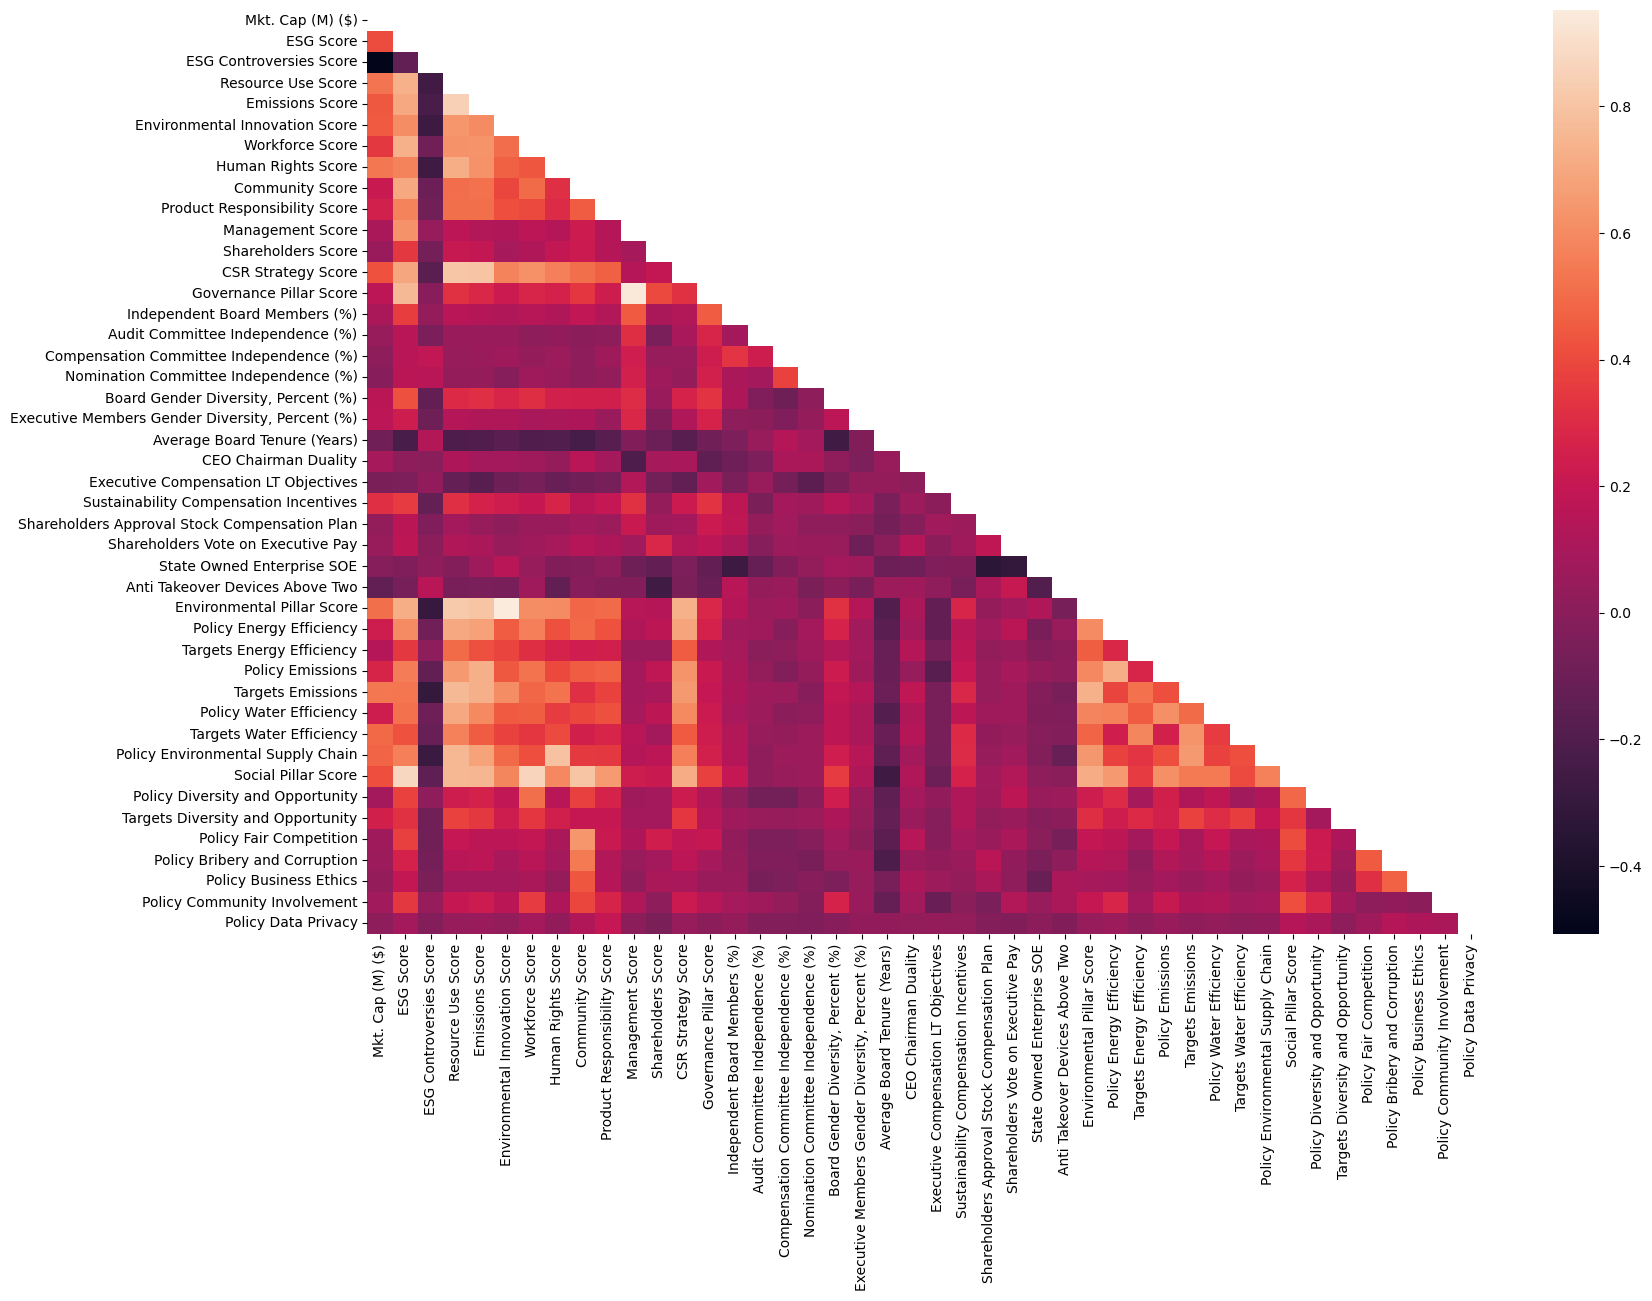

In [184]:
plt.figure(figsize=(18,12))
mask=np.triu(np.ones_like(cormatrix))
sns.heatmap(cormatrix, mask=mask);

In [185]:
df['Mkt. Cap (M) ($)'].max()

416514.0

In [186]:
df['Mkt. Cap (M) ($)'].rank(method='max')

0      331.0
1      330.0
2      317.0
3      320.0
4      324.0
       ...  
326    158.0
327    101.0
328     61.0
329    145.0
330     52.0
Name: Mkt. Cap (M) ($), Length: 331, dtype: float64

In [187]:
fininfo=pd.read_excel('sectorcompetitors1.xlsx')
fininfo

,Name,RIC,Sector,Market Cap (USD),YTD,Beta Value,PE,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
0,JPMorgan Chase & Co,JPM,Banks (NEC),415900100600.880005,6.28635346756153,1.085064,10.513683,12.08485,1.091468,15.22112
1,Bank of America Corp,BAC,Banks (NEC),227678696038.829987,-12.8321256038647,1.377445,8.707218,3.18519,0.889866,11.020622
2,Wells Fargo & Co,WFC,Banks (NEC),156280109566.350006,1.45313635262776,1.125063,11.963103,3.1449,0.729723,8.343253
3,American Express Co,AXP,Consumer Credit Cards Services,124804979519.440002,14.6598984771574,1.179583,17.59312,9.84043,3.349981,29.432558
4,US Bancorp,USB,Banks (NEC),51245538700.129997,-22.9993120843843,0.976309,8.960114,3.69195,0.943184,12.425336
...,...,...,...,...,...,...,...,...,...,...
909,CCF Holdings LLC,CCFLU.PK,Consumer Lending (NEC),--,9900,--,--,--,--,--
910,Community Bancshares Inc,CNUN.PK,Corporate Financial Services (NEC),--,--,--,--,0.81176,1.146102,13.419622
911,Penn Bancshares Inc,PEBA.PK,Banks (NEC),--,-8.33333333333333,--,--,--,--,--
912,Citadel EFT Inc,CDFT.PK,Consumer Credit Cards Services,4353.3913,--,--,--,--,--,--


In [188]:
n=[]
for col in fininfo:
    n.append(col)
n

['Name',
 'RIC',
 'Sector',
 'Market Cap (USD)',
 'YTD',
 'Beta Value',
 'PE',
 'EPS (GAAP)',
 'ROA Tot Assets, LTM',
 'ROE Comm Eqty, LTM']

In [189]:
fininfo.drop('Sector', axis=1, inplace=True)
df=df.rename({'Company Name': 'Name'}, axis=1)
ptob=ptob.rename({'Company Name': 'Name'}, axis=1)

In [190]:
fininfo['Name'].mode()[0]
for i in fininfo.index:
    if fininfo.loc[i,'Name']=='Peoples Bancorp Inc':
        print(fininfo.loc[i])

Name                   Peoples Bancorp Inc
RIC                                 PEBO.O
Market Cap (USD)               964120487.4
YTD                      -3.46902654867257
Beta Value                        0.795094
PE                                7.360542
EPS (GAAP)                         3.60155
ROA Tot Assets, LTM               1.433256
ROE Comm Eqty, LTM               12.747722
Name: 137, dtype: object
Name                   Peoples Bancorp Inc
RIC                                PEBC.PK
Market Cap (USD)                20081690.9
YTD                      -3.67132867132867
Beta Value                        0.359296
PE                                      --
EPS (GAAP)                        -2.54939
ROA Tot Assets, LTM               -0.87095
ROE Comm Eqty, LTM                -8.50646
Name: 708, dtype: object


In [191]:
print('1')
for i in fininfo.index:
    if str(fininfo.loc[i,'Name']).__contains__('Peoples Bancorp'):
        print(fininfo.loc[i,'Market Cap (USD)'],fininfo.loc[i,'Name'],i)
print('2')
for i in df.index:
    if str(df.loc[i,'Name']).__contains__('Peoples Bancorp'):
        print(df.loc[i,'Mkt. Cap (M) ($)'],df.loc[i,'Name'],i)

1
964120487.4 Peoples Bancorp Inc 137
104566739.55 Peoples Bancorp of North Carolina Inc 414
20081690.9 Peoples Bancorp Inc 708
-- Peoples Bancorp 859
2
106.0 Peoples Bancorp of North Carolina Inc 214
964.0 Peoples Bancorp Inc 272


In [192]:
print('1')
for i in fininfo.index:
    if str(fininfo.loc[i,'Name']).__contains__('CNB'):
        print(fininfo.loc[i,'Market Cap (USD)'],fininfo.loc[i,'Name'],i)
print('2')
for i in df.index:
    if str(df.loc[i,'Name']).__contains__('CNB'):
        print(df.loc[i,'Mkt. Cap (M) ($)'],df.loc[i,'Name'],i)

1
381443613.56 CNB Financial Corp 231
267545005.84 ACNB Corp 273
166484543.64 LCNB Corp 354
97324416 CNB Bank 435
91355385 CNB Corp 446
21594620 MCNB Banks Inc 696
20938390 CNB Financial Services Inc 701
20582189 CNB Corp 707
2
166.0 LCNB Corp 67
269.0 ACNB Corp 145
381.0 CNB Financial Corp 201


In [193]:
print('1')
for i in ptob.index:
    if str(ptob.loc[i,'Name']).__contains__('CNB'):
        print(ptob.loc[i,'Market Cap'],ptob.loc[i,'Name'],i)
for i in ptob.index:
    if str(ptob.loc[i,'Name']).__contains__('Peoples Bancorp'):
        print(ptob.loc[i,'Market Cap'],ptob.loc[i,'Name'],i)

1
165817270.92 LCNB Corp 210
381443613.56 CNB Financial Corp 268
269334889.6 ACNB Corp 325
20582189.0 CNB Corp 666
91355385.0 CNB Corp 697
97324416.0 CNB Bank 1168
20938390.0 CNB Financial Services Inc 1346
21594620.0 MCNB Banks Inc 1354
105863254.38 Peoples Bancorp of North Carolina Inc 138
964120487.4 Peoples Bancorp Inc 311
20081690.9 Peoples Bancorp Inc 887
nan Peoples Bancorp 1139


In [194]:

for i in fininfo.index:
    for j in fininfo:
        if fininfo.loc[i,j]=='--':
            fininfo.loc[i,j]=np.nan
fininfo=fininfo.rename({'Market Cap (USD)': 'Market Cap'}, axis=1)

In [195]:
df2=pd.merge(ptob, fininfo, how='right', on=['Name','Market Cap'])
df2

,Identifier (RIC),Name,Price / Book Value Per Share (SmartEstimate ®)\n(NTM),Beta,Market Cap,ESG Controversies Score\n(FY0),"Earnings Per Share - Mean\n(FY1, usd)","Return on Average Common Equity - %, TTM\n(FI0)","Return on Average Total Assets - %, TTM\n(FI0)",RIC,YTD,Beta Value,PE,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
0,NaN,JPMorgan Chase & Co,NaN,NaN,415900100600.880005,NaN,NaN,NaN,NaN,JPM,6.28635346756153,1.085064,10.513683,12.08485,1.091468,15.22112
1,NaN,Bank of America Corp,NaN,NaN,227678696038.829987,NaN,NaN,NaN,NaN,BAC,-12.8321256038647,1.377445,8.707218,3.18519,0.889866,11.020622
2,NaN,Wells Fargo & Co,NaN,NaN,156280109566.350006,NaN,NaN,NaN,NaN,WFC,1.45313635262776,1.125063,11.963103,3.1449,0.729723,8.343253
3,NaN,American Express Co,NaN,NaN,124804979519.440002,NaN,NaN,NaN,NaN,AXP,14.6598984771574,1.179583,17.59312,9.84043,3.349981,29.432558
4,NaN,US Bancorp,NaN,NaN,51245538700.129997,NaN,NaN,NaN,NaN,USB,-22.9993120843843,0.976309,8.960114,3.69195,0.943184,12.425336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,CCFLU.PK,CCF Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCFLU.PK,9900,NaN,NaN,NaN,NaN,NaN
910,CNUN.PK,Community Bancshares Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNUN.PK,NaN,NaN,NaN,0.81176,1.146102,13.419622
911,PEBA.PK,Penn Bancshares Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEBA.PK,-8.33333333333333,NaN,NaN,NaN,NaN,NaN
912,CDFT.PK,Citadel EFT Inc,NaN,NaN,4353.3913,NaN,NaN,NaN,NaN,CDFT.PK,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
print('Economic')
for i in df2.index:
    if str(df2.loc[i,'Name']).__contains__('CNB'):
        print(df2.loc[i,'Market Cap'],df2.loc[i,'Name'],i)
for i in df2.index:
    if str(df2.loc[i,'Name']).__contains__('Peoples Bancorp'):
        print(df2.loc[i,'Market Cap'],df2.loc[i,'Name'],i)
print('ESG')
for i in df.index:
    if str(df.loc[i,'Name']).__contains__('CNB'):
        print(df.loc[i,'Mkt. Cap (M) ($)'],df.loc[i,'Name'],i)
for i in df.index:
    if str(df.loc[i,'Name']).__contains__('Peoples Bancorp'):
        print(df.loc[i,'Mkt. Cap (M) ($)'],df.loc[i,'Name'],i)

Economic
381443613.56 CNB Financial Corp 231
267545005.84 ACNB Corp 273
166484543.64 LCNB Corp 354
97324416.0 CNB Bank 435
91355385.0 CNB Corp 446
21594620.0 MCNB Banks Inc 696
20938390.0 CNB Financial Services Inc 701
20582189.0 CNB Corp 707
964120487.4 Peoples Bancorp Inc 137
104566739.55 Peoples Bancorp of North Carolina Inc 414
20081690.9 Peoples Bancorp Inc 708
nan Peoples Bancorp 859
ESG
166.0 LCNB Corp 67
269.0 ACNB Corp 145
381.0 CNB Financial Corp 201
106.0 Peoples Bancorp of North Carolina Inc 214
964.0 Peoples Bancorp Inc 272


In [197]:
df2.drop([708], axis=0, inplace=True)

In [198]:
df3=pd.merge(df, df2, how='left', on='Name')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Name                                                  331 non-null    object 
 1   Mkt. Cap (M) ($)                                      331 non-null    float32
 2   ESG Score                                             331 non-null    float64
 3   ESG Controversies Score                               331 non-null    int64  
 4   Resource Use Score                                    331 non-null    int64  
 5   Emissions Score                                       331 non-null    int64  
 6   Environmental Innovation Score                        331 non-null    int64  
 7   Workforce Score                                       331 non-null    int64  
 8   Human Rights Score                                    331 no

In [199]:

for i in df3.index:
    if pd.isna(df3.loc[i, 'RIC']):
        print(df3.loc[i, 'Name'])
        print(df3.loc[i])

In [200]:
for i in df3:
    if df3.isna().sum()[i]>0:
        print(i, df3.isna().sum()[i])

Audit Committee Independence (%) 3
Compensation Committee Independence (%) 9
Nomination Committee Independence (%) 28
Average Board Tenure (Years) 1
Identifier (RIC) 154
Price / Book Value Per Share (SmartEstimate ®)
(NTM) 182
Beta 154
ESG Controversies Score
(FY0) 154
Earnings Per Share - Mean
(FY1, usd) 170
Return on Average Common Equity - %, TTM
(FI0) 160
Return on Average Total Assets - %, TTM
(FI0) 157
PE 16
ROA Tot Assets, LTM 2
ROE Comm Eqty, LTM 7


In [201]:
roe0='Return on Average Common Equity - %, TTM\n(FI0)'
roa0='Return on Average Total Assets - %, TTM\n(FI0)'
roe1='ROA Tot Assets, LTM'
roa1='ROE Comm Eqty, LTM'

for i in df3.index:
    if (not pd.isna(df3[roa0][i]) and pd.isna(df3[roa1][i])): #or (pd.isna(df3[roe1][i]) and not pd.isna(df3[roe0][i])):
        print(df3['Name'][i])
        df3.loc[i,roa1]=df3.loc[i,roa0]
        

Federal National Mortgage Association
Impac Mortgage Holdings Inc
Federal Home Loan Mortgage Corp


In [202]:
k=['Identifier (RIC)',
'Price / Book Value Per Share (SmartEstimate ®)\n(NTM)',
'Beta',
'ESG Controversies Score\n(FY0)',
'Earnings Per Share - Mean\n(FY1, usd)',
'Return on Average Common Equity - %, TTM\n(FI0)',
'Return on Average Total Assets - %, TTM\n(FI0)',
'PE']
df3.drop(k, axis=1, inplace=True)

In [203]:
df3

,Name,Mkt. Cap (M) ($),ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,...,Policy Community Involvement,Policy Data Privacy,Size,Market Cap,RIC,YTD,Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
0,JPMorgan Chase & Co,416514.0,84.66,23,98,72,80,83,96,91,...,True,True,Small,415900100600.880005,JPM,6.28635346756153,1.085064,12.08485,1.091468,15.22112
1,Bank of America Corp,230069.0,81.28,12,96,85,80,98,87,98,...,True,True,Small,227678696038.829987,BAC,-12.8321256038647,1.377445,3.18519,0.889866,11.020622
2,Huntington Bancshares Inc,15476.0,78.87,100,75,72,70,86,40,99,...,True,True,Small,15475552435.52,HBAN.O,-23.9716312056738,1.089883,1.45029,1.307915,13.919346
3,Fifth Third Bancorp,18168.0,78.78,92,95,84,91,84,60,95,...,True,True,Small,18168310733.939999,FITB.O,-18.6528497409326,1.208803,3.34987,1.194908,13.926375
4,Capital One Financial Corp,41663.0,75.77,92,92,78,51,80,57,98,...,True,True,Small,41341976960.199997,COF,17.3838209982788,1.460443,17.91455,1.30639,11.08106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Kearny Financial Corp,488.0,12.18,100,0,0,0,6,0,10,...,False,True,Small,487696296.42,KRNY.O,-27.2906403940887,0.613927,0.95226,0.510419,4.410676
327,Home Bancorp Inc,278.0,10.41,100,0,0,0,1,0,28,...,False,True,Small,278052195.9,HBCP.O,-15.8131401448913,0.664591,4.15816,1.242302,12.010185
328,National Bankshares Inc,185.0,8.68,100,0,0,0,4,0,19,...,False,True,Small,198482451.9,NKSH.O,-19.98247951826,0.462053,4.3295,1.515323,17.498597
329,Hingham Institution For Savings,450.0,8.39,100,0,0,0,7,0,4,...,True,True,Small,442153074,HIFS.O,-24.1919118712857,0.892089,17.0386,0.870135,9.014524


ptob.rename({'Company Name': 'Name', 'Price / Book Value Per Share (SmartEstimate ®)\n(NTM)': 'Price/Book'}, axis=1, inplace=True)
ptob

financial=pd.read_excel('USBanksfinance.xlsx')
financial

financial.rename({'Market Cap (USD)': 'Market Cap'},axis=1, inplace=True)

df2=pd.merge(df3, ptob, how='left', on='Name')
df2.info()

In [204]:
u=[]
for col in df3:
    if df3[col].dtype==object:
        u.append(col)
        print(df3[col].value_counts())
u

Name
JPMorgan Chase & Co            1
National Bank Holdings Corp    1
Citizens Holding Co            1
FB Financial Corp              1
Sterling Bancorp Inc           1
                              ..
Lakeland Bancorp Inc           1
Waterstone Financial Inc       1
Flushing Financial Corp        1
First Western Financial Inc    1
Exchange Bank                  1
Name: count, Length: 331, dtype: int64
Size
Small    331
Name: count, dtype: int64
Market Cap
4.159001e+11    1
1.186756e+09    1
6.918834e+07    1
1.360392e+09    1
2.742744e+08    1
               ..
9.453759e+08    1
3.170590e+08    1
4.037019e+08    1
1.746351e+08    1
1.714173e+08    1
Name: count, Length: 331, dtype: int64
RIC
JPM        1
NBHC.K     1
CIZN.O     1
FBK        1
SBT.O      1
          ..
LBAI.O     1
WSBF.O     1
FFIC.O     1
MYFW.O     1
EXSR.PK    1
Name: count, Length: 331, dtype: int64
YTD
6.28635346756153     1
-24.197765628714     1
-8.02919708029197    1
-18.7327061427781    1
-9.85221674876847  

['Name',
 'Size',
 'Market Cap',
 'RIC',
 'YTD',
 'Beta Value',
 'EPS (GAAP)',
 'ROA Tot Assets, LTM',
 'ROE Comm Eqty, LTM']

In [205]:
l=['Name',
 'RIC',
 'Market Cap',
 'YTD',
 'Beta Value',
 'EPS (GAAP)',
 'ROA Tot Assets, LTM',
 'ROE Comm Eqty, LTM']
for c in l:
    print(df3[c].mode())

0                      1st Source Corp
1                            ACNB Corp
2                  Aaron's Company Inc
3                Alerus Financial Corp
4                   Ally Financial Inc
                    ...               
326           Western Alliance Bancorp
327    Western New England Bancorp Inc
328            Wintrust Financial Corp
329              World Acceptance Corp
330            Zions Bancorporation NA
Name: Name, Length: 331, dtype: object
0         AAN
1      ABCB.O
2      ACNB.O
3         AGM
4      ALLY.K
        ...  
326    WSBF.O
327    WSFS.O
328    WTBA.O
329    WTFC.O
330    ZION.O
Name: RIC, Length: 331, dtype: object
0                1828443.8
1              8564469.168
2              26909812.55
3            27676432.4375
4            48398247.6671
              ...         
326     51245538700.129997
327    124804979519.440002
328    156280109566.350006
329    227678696038.829987
330    415900100600.880005
Name: Market Cap, Length: 331, dtype: objec

In [206]:
p=0
x=0
for y in l:
    for x in df3.index:
        if df3.loc[x,y]=='--':
            p=p+1
            ++x
            df3.loc[x,y]=np.nan
        ++x
print(p, 'total')

0 total


In [207]:
l2=['Market Cap',
 'YTD',
 'Beta Value',
 'EPS (GAAP)',
 'ROA Tot Assets, LTM',
 'ROE Comm Eqty, LTM']
for h in l2:
    df3[h] = df3[h].astype(str).str.extract(r'(\d+\.\d+|\d+)')
    df3[h] = pd.to_numeric(df3[h],downcast='float') 
u=[]
for col in df3:
    if df3[col].dtype==object:
        u.append(col)
        print(df3[col].value_counts())
u

Name
JPMorgan Chase & Co            1
National Bank Holdings Corp    1
Citizens Holding Co            1
FB Financial Corp              1
Sterling Bancorp Inc           1
                              ..
Lakeland Bancorp Inc           1
Waterstone Financial Inc       1
Flushing Financial Corp        1
First Western Financial Inc    1
Exchange Bank                  1
Name: count, Length: 331, dtype: int64
Size
Small    331
Name: count, dtype: int64
RIC
JPM        1
NBHC.K     1
CIZN.O     1
FBK        1
SBT.O      1
          ..
LBAI.O     1
WSBF.O     1
FFIC.O     1
MYFW.O     1
EXSR.PK    1
Name: count, Length: 331, dtype: int64


['Name', 'Size', 'RIC']

In [208]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             331 non-null    object 
 1   Mkt. Cap (M) ($)                                 331 non-null    float32
 2   ESG Score                                        331 non-null    float64
 3   ESG Controversies Score                          331 non-null    int64  
 4   Resource Use Score                               331 non-null    int64  
 5   Emissions Score                                  331 non-null    int64  
 6   Environmental Innovation Score                   331 non-null    int64  
 7   Workforce Score                                  331 non-null    int64  
 8   Human Rights Score                               331 non-null    int64  
 9   Community Score                 

In [209]:
df3.drop('Mkt. Cap (M) ($)', axis=1, inplace=True)

In [210]:
df3['Size']=''
M=1000000
mkt='Market Cap'
for d in df3.index:
    if df3.loc[d, mkt] < 1000*M:
        df3.loc[d,'Size']='Small'
    elif df3.loc[d, mkt] > 10000*M:
        df3.loc[d, 'Size']='Large'
    else:
        df3.loc[d, 'Size']='Medium'
df3['Size'].value_counts()        
    
    

Size
Small     206
Medium    108
Large      17
Name: count, dtype: int64

In [211]:

for i in df3.index:
    if df3['Name'][i]=='Peoples Bancorp Inc':
        print(df3.loc[i, 'Name'])


Peoples Bancorp Inc


In [212]:
df3.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             331 non-null    object 
 1   ESG Score                                        331 non-null    float64
 2   ESG Controversies Score                          331 non-null    int64  
 3   Resource Use Score                               331 non-null    int64  
 4   Emissions Score                                  331 non-null    int64  
 5   Environmental Innovation Score                   331 non-null    int64  
 6   Workforce Score                                  331 non-null    int64  
 7   Human Rights Score                               331 non-null    int64  
 8   Community Score                                  331 non-null    int64  
 9   Product Responsibility Score    

In [213]:
df3.rename({'YTD': 'YTD (%)'}, axis=1, inplace=True)

In [214]:
x1,y1,z1=[],[],[]
for d in df3.index:
    if df3.loc[d, 'Size']!='Small':
        x1.append(d)
    if df3.loc[d, 'Size'] !='Medium':
        y1.append(d)
    if df3.loc[d, 'Size'] != 'Large':
        z1.append(d)
small=df3.drop(x1,axis=0)
med=df3.drop(y1,axis=0)
large=df3.drop(z1,axis=0)


In [215]:
small

,Name,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Policy Community Involvement,Policy Data Privacy,Size,Market Cap,RIC,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
16,Amalgamated Bank,62.26,100,71,54,69,58,60,59,74,...,True,True,Small,4.963070e+08,AMAL.O,29.166666,0.777283,2.612030,1.144625,16.955896
20,Bar Harbor Bankshares,59.13,100,20,37,0,73,0,95,30,...,True,True,Small,3.875236e+08,BHB,18.726591,0.809867,2.882280,1.245501,11.640048
29,Community Trust Bancorp Inc,53.12,100,0,11,0,52,0,95,74,...,True,True,Small,6.727702e+08,CTBI.O,18.549967,0.731652,4.583160,1.483697,12.425508
31,CPI Card Group Inc,52.96,100,68,37,4,14,71,71,87,...,False,True,Small,2.898946e+08,PMTS.O,29.351440,1.267748,3.110020,14.183233,NaN
34,Heritage Financial Corp,51.79,100,6,37,0,51,0,84,74,...,True,True,Small,5.947088e+08,HFWA.O,44.712795,0.560811,2.308690,1.121896,10.024091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Kearny Financial Corp,12.18,100,0,0,0,6,0,10,30,...,False,True,Small,4.876963e+08,KRNY.O,27.290640,0.613927,0.952260,0.510419,4.410676
327,Home Bancorp Inc,10.41,100,0,0,0,1,0,28,30,...,False,True,Small,2.780522e+08,HBCP.O,15.813140,0.664591,4.158160,1.242302,12.010184
328,National Bankshares Inc,8.68,100,0,0,0,4,0,19,30,...,False,True,Small,1.984825e+08,NKSH.O,19.982479,0.462053,4.329500,1.515323,17.498598
329,Hingham Institution For Savings,8.39,100,0,0,0,7,0,4,30,...,True,True,Small,4.421531e+08,HIFS.O,24.191912,0.892089,17.038601,0.870135,9.014524


In [216]:
dfs=[small, med, large]
for df1 in dfs:
    for col in df1:
        for i in df1.index:
            if df1[col].dtype==bool or df1[col].dtype ==object:
                df1[col].fillna(False, inplace=True)
            else:
                df1[col].fillna(df1[col].mean(), inplace=True)
small.info()               

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 16 to 330
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             206 non-null    object 
 1   ESG Score                                        206 non-null    float64
 2   ESG Controversies Score                          206 non-null    int64  
 3   Resource Use Score                               206 non-null    int64  
 4   Emissions Score                                  206 non-null    int64  
 5   Environmental Innovation Score                   206 non-null    int64  
 6   Workforce Score                                  206 non-null    int64  
 7   Human Rights Score                               206 non-null    int64  
 8   Community Score                                  206 non-null    int64  
 9   Product Responsibility Score        

In [217]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 8 to 315
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             108 non-null    object 
 1   ESG Score                                        108 non-null    float64
 2   ESG Controversies Score                          108 non-null    int64  
 3   Resource Use Score                               108 non-null    int64  
 4   Emissions Score                                  108 non-null    int64  
 5   Environmental Innovation Score                   108 non-null    int64  
 6   Workforce Score                                  108 non-null    int64  
 7   Human Rights Score                               108 non-null    int64  
 8   Community Score                                  108 non-null    int64  
 9   Product Responsibility Score         

In [218]:
medcols=list(med.columns)
mandl=pd.merge(med, large, how='outer', on=medcols)
df3=pd.merge(mandl, small, how='outer', on=medcols)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             331 non-null    object 
 1   ESG Score                                        331 non-null    float64
 2   ESG Controversies Score                          331 non-null    int64  
 3   Resource Use Score                               331 non-null    int64  
 4   Emissions Score                                  331 non-null    int64  
 5   Environmental Innovation Score                   331 non-null    int64  
 6   Workforce Score                                  331 non-null    int64  
 7   Human Rights Score                               331 non-null    int64  
 8   Community Score                                  331 non-null    int64  
 9   Product Responsibility Score    

In [219]:
matrixcor=df3.corr(numeric_only=True)
matrixcor

,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.138295,0.733202,0.706403,0.605188,0.733077,0.571042,0.705082,0.572673,0.626827,...,0.261290,0.192922,0.343618,0.088384,0.406153,0.035826,0.282851,0.074863,-0.027527,0.000786
ESG Controversies Score,-0.138295,1.000000,-0.251399,-0.222611,-0.278297,-0.080660,-0.267169,-0.104113,-0.087148,0.042110,...,-0.073189,-0.047057,0.041838,-0.018767,-0.506594,-0.065761,-0.139401,0.021982,-0.198803,-0.021129
Resource Use Score,0.733202,-0.251399,1.000000,0.848077,0.633638,0.623713,0.724125,0.504348,0.510634,0.166299,...,0.159665,0.090972,0.202367,0.044250,0.525651,0.003365,0.293032,0.153817,0.053993,0.039718
Emissions Score,0.706403,-0.222611,0.848077,1.000000,0.604518,0.630400,0.626413,0.515603,0.513366,0.134301,...,0.166552,0.084199,0.228299,0.054369,0.440467,0.052328,0.313676,0.136506,0.030277,0.043388
Environmental Innovation Score,0.605188,-0.278297,0.633638,0.604518,1.000000,0.502329,0.465478,0.391532,0.410896,0.126128,...,0.102702,0.084860,0.164492,0.033843,0.447966,-0.005551,0.242317,0.071138,-0.075464,-0.027962
Workforce Score,0.733077,-0.080660,0.623713,0.630400,0.502329,1.000000,0.434803,0.498315,0.396237,0.170776,...,0.159379,0.108784,0.356225,0.084009,0.342259,-0.024642,0.229151,0.077619,-0.070091,-0.002164
Human Rights Score,0.571042,-0.267169,0.724125,0.626413,0.465478,0.434803,1.000000,0.317443,0.298919,0.140829,...,0.087757,0.034967,0.114724,0.028342,0.539579,-0.032707,0.200718,0.072823,0.071524,-0.016687
Community Score,0.705082,-0.104113,0.504348,0.515603,0.391532,0.498315,0.317443,1.000000,0.453844,0.223978,...,0.544898,0.434936,0.388622,0.129794,0.215971,0.047742,0.282054,0.100308,0.004188,0.034632
Product Responsibility Score,0.572673,-0.087148,0.510634,0.513366,0.410896,0.396237,0.298919,0.453844,1.000000,0.137567,...,0.131506,0.146787,0.268771,0.198033,0.252695,0.108035,0.254003,0.099679,0.023357,0.034523
Management Score,0.626827,0.042110,0.166299,0.134301,0.126128,0.170776,0.140829,0.223978,0.137567,1.000000,...,0.046746,0.012449,0.127987,0.010224,0.103215,0.011150,0.021389,-0.037968,-0.071586,-0.034087


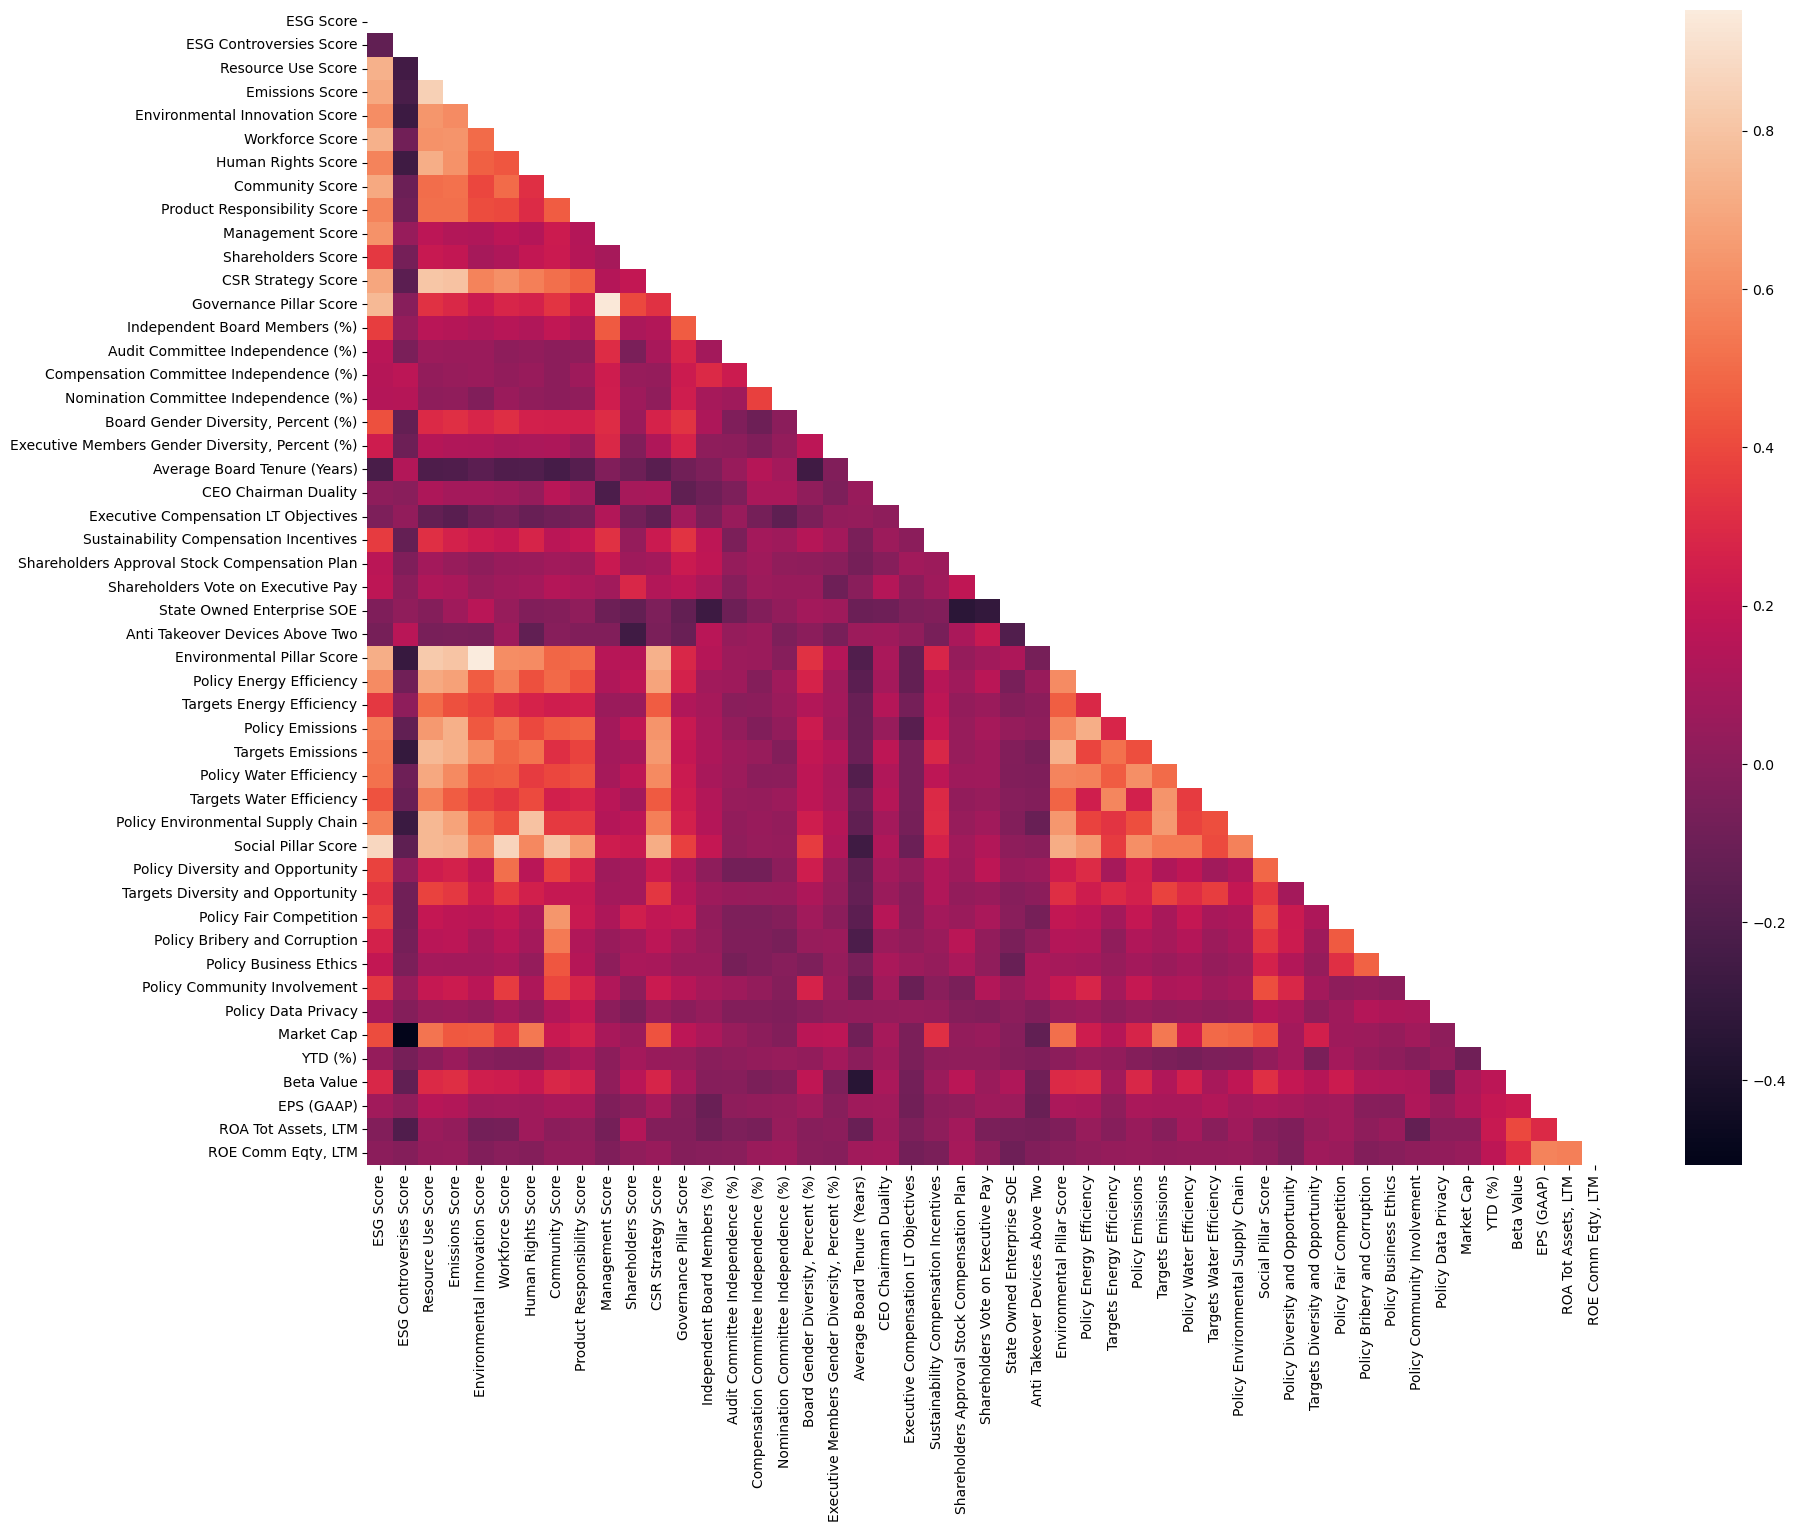

In [221]:
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(matrixcor, dtype=bool))
sns.heatmap(matrixcor, mask=mask);

In [222]:
df3.to_excel('Refinitiv Data1.xlsx')